In [13]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data = load_diabetes().data
target = load_diabetes().target
features = load_diabetes().feature_names

diabetesDF = pd.DataFrame(data, columns=features)
diabetesDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [10]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([ -24.33817515, -238.65133804,  512.75263948,  260.55138053,
       -815.96872669,  539.14349843,  115.89428162,  204.40672613,
        775.54701804,   56.55652298])

In [16]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

Text(0.5, 1.0, 'Diabetes Feature Coefficients')

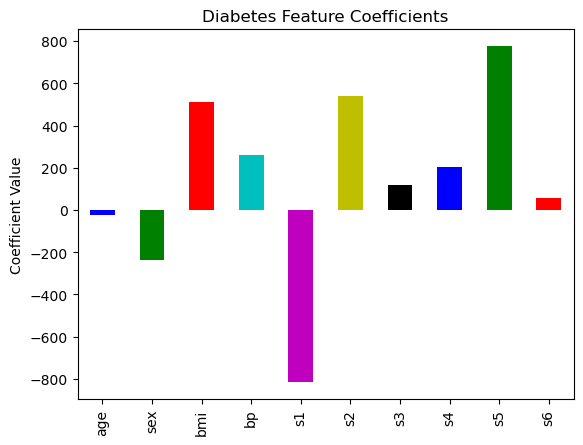

In [26]:
coef = pd.Series(model.coef_, index=features)
coef.plot(kind='bar', color=list('bgrcmyk'))
plt.ylabel('Coefficient Value')
plt.title('Diabetes Feature Coefficients')

In [86]:
diabetes_X = diabetesDF[['s5']]
diabetes_y = target

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2)
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train, test_size=0.20)

polymodel = LinearRegression()

max_p = 5
degrees = range(1, max_p + 1)
train_mean_scores = []
error_v_train = []
error_v_valid = []
valid_scores = []

for d in degrees:
    #calculate polynomial features
    X_v_train_poly = PolynomialFeatures(degree=d).fit_transform(X_v_train)
    X_v_valid_poly = PolynomialFeatures(degree=d).fit_transform(X_v_valid)
    polymodel = LinearRegression()
    train_scores = cross_val_score(polymodel, X_v_train_poly, y_v_train)
    train_score = train_scores.mean()
    train_mean_scores.append(train_score)

    polymodel.fit(X_v_train_poly, y_v_train)
    valid_mse = mean_squared_error(polymodel.predict(X_v_valid_poly), y_v_valid)
    error_v_train.append(valid_mse)
    train_mse = mean_squared_error(polymodel.predict(X_v_train_poly), y_v_train)
    error_v_valid.append(train_mse)
    valid_score = polymodel.score(X_v_valid_poly, y_v_valid)
    valid_scores.append(valid_score)

    print(f"Degree {d}: Train mean R^2 score: {train_score}, Valid R^2 score: {valid_score} Train MSE: {train_mse}, Validation MSE: {valid_mse}")



Degree 1: Train mean R^2 score: 0.2732233361098144, Valid R^2 score: 0.3827070195456417 Train MSE: 3934.7195119699545, Validation MSE: 3578.8898356920067
Degree 2: Train mean R^2 score: 0.2683013572466619, Valid R^2 score: 0.3892198975815524 Train MSE: 3929.3995477536278, Validation MSE: 3541.1300137891785
Degree 3: Train mean R^2 score: 0.29062471557682396, Valid R^2 score: 0.4302859072705344 Train MSE: 3799.3897498817487, Validation MSE: 3303.0409226737256
Degree 4: Train mean R^2 score: 0.2794758723929166, Valid R^2 score: 0.4297380241992559 Train MSE: 3799.0633562122125, Validation MSE: 3306.217393518256
Degree 5: Train mean R^2 score: 0.2756114651931408, Valid R^2 score: 0.42864459063261906 Train MSE: 3798.715648865876, Validation MSE: 3312.5568115928963


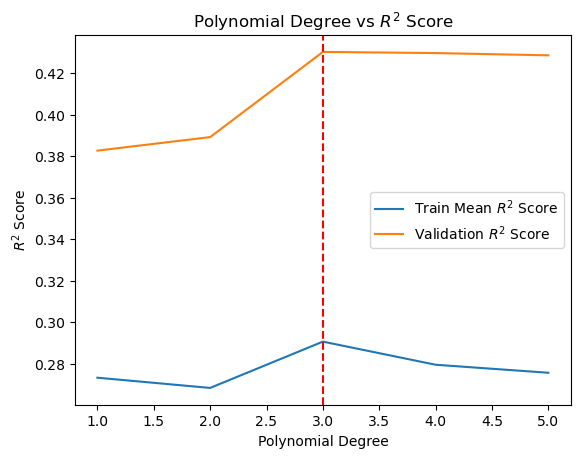

In [87]:
plt.plot(degrees, train_mean_scores, label='Train Mean $R^2$ Score')
plt.plot(degrees, valid_scores, label='Validation $R^2$ Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.title('Polynomial Degree vs $R^2$ Score')

best_degree_r2 = np.argmax(valid_scores)+1
plt.axvline(x=best_degree_r2, color='r', linestyle='--', label='Best Degree')

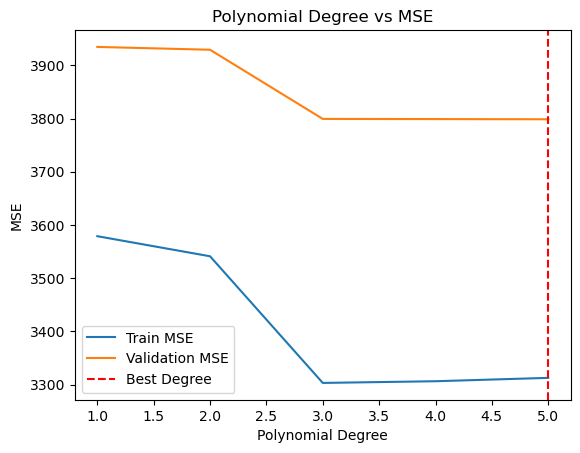

In [88]:
plt.plot(degrees, error_v_train, label='Train MSE')
plt.plot(degrees, error_v_valid, label='Validation MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

plt.title('Polynomial Degree vs MSE')

best_degree_mse = np.argmin(error_v_valid)+1
plt.axvline(x=best_degree_mse, color='r', linestyle='--', label='Best Degree')

plt.legend()

In [89]:
polymodel_all = LinearRegression()
X_train_poly = PolynomialFeatures(degree=best_degree_r2).fit_transform(X_train)
polymodel_all.fit(X_train_poly, y_train)
X_test_poly = PolynomialFeatures(degree=best_degree_r2).fit_transform(X_test)
test_score = polymodel_all.score(X_test_poly, y_test)
test_mse = mean_squared_error(polymodel_all.predict(X_test_poly), y_test)
print(f"Test R^2 score: {test_score}, Test MSE: {test_mse}")


Test R^2 score: 0.33926799133600927, Test MSE: 4705.094071409473
